In [1]:
#based of https://www.tensorflow.org/tutorials/load_data/images
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import re

print(tf.__version__)

import pathlib

path = "C:/Users/Startklar/Documents/Computer Science/Uni Year 3/Term 2/Individual Project/Farbic classification/Fabrics"
data_dir = pathlib.Path(path)

image_count = len(list(data_dir.glob('*/*/*.png')))
print(str(image_count) + "\n")

Acrylic = list(data_dir.glob('Acrylic/*/*'))
Artificial_fur = list(data_dir.glob('Artificial_fur/*/*'))
Artificial_leather = list(data_dir.glob('Artificial_leather/*/*'))
Blended = list(data_dir.glob('Blended/*/*'))
Chenille = list(data_dir.glob('Chenille/*/*'))
Corduroy = list(data_dir.glob('Corduroy/*/*'))
Cotton = list(data_dir.glob('Cotton/*/*'))
Crepe = list(data_dir.glob('Crepe/*/*'))
Denim = list(data_dir.glob('Denim/*/*'))
Felt = list(data_dir.glob('Felt/*/*'))
Fleece = list(data_dir.glob('Fleece/*/*'))
Fur = list(data_dir.glob('Fur/*/*'))
Leather = list(data_dir.glob('Leather/*/*'))
Linen = list(data_dir.glob('Linen/*/*'))
Lut = list(data_dir.glob('Lut/*/*'))
Nylon = list(data_dir.glob('Nylon/*/*'))
Polyester = list(data_dir.glob('Polyester/*/*'))
Satin = list(data_dir.glob('Satin/*/*'))
Silk = list(data_dir.glob('Silk/*/*'))
Suede = list(data_dir.glob('Suede/*/*'))
Terrycloth = list(data_dir.glob('Terrycloth/*/*'))
Unclassified = list(data_dir.glob('Unclassified/*/*'))
Utilities = list(data_dir.glob('Utilities/*/*'))
Velvet = list(data_dir.glob('Velvet/*/*'))
Viscose = list(data_dir.glob('Viscose/*/*'))
Wool = list(data_dir.glob('Wool/*/*'))

fabrics = [Acrylic, 
           Artificial_fur,
           Artificial_leather,
           Blended,
           Chenille,
           Corduroy,
           Cotton,
           Crepe,
           Denim,
           Felt,
           Fleece,
           Fur,
           Leather,
           Linen,
           Lut,
           Nylon,
           Polyester,
           Satin,
           Silk,
           Suede,
           Terrycloth,
           Unclassified,
           Utilities,
           Velvet,
           Viscose,
           Wool]
for fabric in fabrics:
    print(len(fabric))

2.8.0
7881

60
5
15
2056
65
120
2940
130
810
20
165
0
80
95
20
285
1130
120
250
25
150
615
8
55
185
450


In [2]:
batch_size = 32
img_height = 400
img_width = 400

AUTOTUNE = tf.data.AUTOTUNE

b'C:\\Users\\Startklar\\Documents\\Computer Science\\Uni Year 3\\Term 2\\Individual Project\\Farbic classification\\Fabrics\\Wool\\1440\\im_1.png'
b'C:\\Users\\Startklar\\Documents\\Computer Science\\Uni Year 3\\Term 2\\Individual Project\\Farbic classification\\Fabrics\\Terrycloth\\145\\im_1.png'
b'C:\\Users\\Startklar\\Documents\\Computer Science\\Uni Year 3\\Term 2\\Individual Project\\Farbic classification\\Fabrics\\Blended\\533\\im_1.png'
b'C:\\Users\\Startklar\\Documents\\Computer Science\\Uni Year 3\\Term 2\\Individual Project\\Farbic classification\\Fabrics\\Cotton\\162\\im_3.png'
b'C:\\Users\\Startklar\\Documents\\Computer Science\\Uni Year 3\\Term 2\\Individual Project\\Farbic classification\\Fabrics\\Blended\\1623\\im_3.png'
['Acrylic' 'Artificial_fur' 'Artificial_leather' 'Blended' 'Chenille'
 'Corduroy' 'Cotton' 'Crepe' 'Denim' 'Felt' 'Fleece' 'Fur' 'Leather'
 'Linen' 'Lut' 'Nylon' 'Polyester' 'Satin' 'Silk' 'Suede' 'Terrycloth'
 'Unclassified' 'Utilities' 'Velvet' 'Viscos

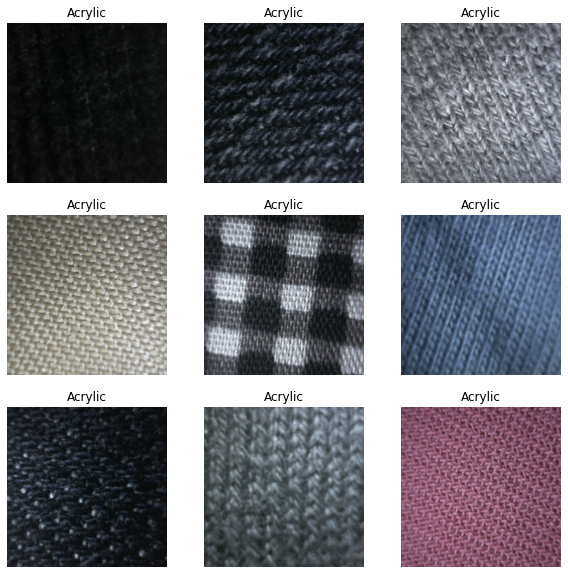

In [3]:
# Using the td.data to convert to convert to list and operate on it
import matplotlib.pyplot as plt

list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*/*.png'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

for f in list_ds.take(5):
  print(f.numpy())

class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

"""
Configure dataset for performance

To train a model with this dataset you will want the data:

    To be well shuffled.
    To be batched.
    Batches to be available as soon as possible.

These features can be added using the tf.data API. 
For more details, visit the Input Pipeline Performance guide.
"""
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

# Visualise
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

num_classes = 26

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)
